# Project1

Data Preprocessing & EDA
In Data Analysis What all Things We do
1. Handling Missing Values
2. Explore Numerical & Categorical Variables
3. Finding relatioship between features

# Generic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

import warnings
warnings.filterwarnings('ignore')

# Loading Matches dataset

In [2]:
Matches = pd.read_csv('matches.csv')
Matches.head()

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Matches.columns

Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       ...
       'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166', 'Unnamed: 167',
       'Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170', 'Unnamed: 171',
       'Unnamed: 172', 'Unnamed: 173'],
      dtype='object', length=174)

# OBSERVATION

1. Some unnecessary columns found which need to drop
2. Handling both categorical & Numerical columns separately

In [4]:
Matches.shape

(1700, 174)

In [5]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 174 entries, id to Unnamed: 173
dtypes: bool(1), float64(156), int64(5), object(12)
memory usage: 2.2+ MB


In [6]:
Matches.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1700.0,2.289242e+04,3.584445e+04,5.430000e+02,2.970750e+03,4.328500e+03,2.156525e+04,1.029800e+05
venueId,1700.0,4.913962e+03,2.129321e+04,1.000000e+00,4.575000e+01,8.400000e+01,1.280000e+02,1.002360e+05
team1Id,1700.0,1.367768e+07,1.369351e+08,0.000000e+00,1.569250e+03,3.271000e+03,8.300000e+03,2.147212e+09
team2Id,1700.0,1.541787e+07,1.453228e+08,0.000000e+00,1.569750e+03,3.272000e+03,8.301000e+03,2.089043e+09
matchDateMs,1675.0,1.391383e+12,3.210956e+11,1.713710e+11,1.374110e+12,1.488090e+12,1.583525e+12,1.694520e+12
...,...,...,...,...,...,...,...,...
Unnamed: 169,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 170,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 171,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 172,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Matches.isnull().sum()

id                 0
venueId            0
toss.elected     100
toss.winner      100
team1Id            0
                ... 
Unnamed: 169    1700
Unnamed: 170    1700
Unnamed: 171    1700
Unnamed: 172    1700
Unnamed: 173    1700
Length: 174, dtype: int64

In [8]:
Matches.drop (Matches.columns [Matches.columns.str.contains ('Unnamed',case = False)],axis = 1, inplace = True)

In [9]:
Matches.columns

Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchStatus_victoryMarginInningsRuns', 'description', 'matchSummary',
       'matchType', 'tournamentLabel', 'oversLimit', 'totalBalls',
       'isLimitedOvers', 'match.summary', 'matchStatus', 'umpire.name.5'],
      dtype='object')

In [10]:
Matches.shape

(1700, 25)

Getting Categorical columns separately

In [11]:
def cat_num(Matches):
    
    categorical_columns = Matches.select_dtypes(include=['object']).columns
    numerical_columns = Matches.select_dtypes(exclude=['object']).columns
    
    categorical_columns = Matches.select_dtypes(include=['object']).columns
    print("Categorical Columns:")
    print(categorical_columns)
    print("\nMissing Values are : ")
    print(Matches[categorical_columns].isnull().sum())
    
    Numerical_columns = Matches.select_dtypes(exclude=['object']).columns
    print("\nNumerical Columns:")
    print(Numerical_columns)
    print("\nMissing Values are : ")
    print(Matches[Numerical_columns].isnull().sum())
    

In [12]:
cat_num(Matches)

Categorical Columns:
Index(['toss.elected', 'toss.winner', 'matchDate', 'matchEndDate',
       'matchStatus_outcome', 'matchStatus_text', 'description',
       'matchSummary', 'matchType', 'tournamentLabel', 'match.summary',
       'umpire.name.5'],
      dtype='object')

Missing Values are : 
toss.elected            100
toss.winner             100
matchDate                 0
matchEndDate             26
matchStatus_outcome      11
matchStatus_text          8
description               0
matchSummary            799
matchType                 0
tournamentLabel           0
match.summary           822
umpire.name.5          1698
dtype: int64

Numerical Columns:
Index(['id', 'venueId', 'team1Id', 'team2Id', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchStatus_victoryMarginInningsRuns', 'oversLimit', 'totalBalls',
       'isLimitedOvers', 'matchStatus'],
      dtype='object')

Missing Values are : 
id                  

In [98]:
Matches['team1Id'].unique()

array([2808, 2810, 2812, ...,   11,  111,   66], dtype=int64)

Imputing Date Columns

In [13]:
Matches['matchEndDate']=Matches['matchEndDate'].fillna(Matches['matchDate'])

Changing Date format

In [14]:
Matches['matchDate'] = pd.to_datetime(Matches['matchDate'], infer_datetime_format=True,utc=True)
Matches['matchEndDate']=pd.to_datetime(Matches['matchEndDate'],infer_datetime_format=True,utc=True)

In [15]:
Matches['matchEndDate'].unique()

<DatetimeArray>
['1975-06-07 23:00:00+00:00', '1975-06-11 23:00:00+00:00',
 '1975-06-14 23:00:00+00:00', '1975-06-18 23:00:00+00:00',
 '1975-06-21 23:00:00+00:00', '1979-06-09 23:00:00+00:00',
 '1979-06-13 23:00:00+00:00', '1979-06-16 23:00:00+00:00',
 '1979-06-20 23:00:00+00:00', '1979-06-23 23:00:00+00:00',
 ...
 '2023-09-05 17:00:00+00:00', '2023-09-06 17:00:00+00:00',
 '2023-09-07 19:00:00+00:00', '2023-09-08 19:30:00+00:00',
 '2023-09-09 16:30:00+00:00', '2023-09-09 19:00:00+00:00',
 '2023-09-10 16:30:00+00:00', '2023-09-10 18:00:00+00:00',
 '2023-09-12 16:30:00+00:00', '2023-09-12 19:00:00+00:00']
Length: 1519, dtype: datetime64[ns, UTC]

In [16]:
Matches.isnull().sum()/100

id                                       0.00
venueId                                  0.00
toss.elected                             1.00
toss.winner                              1.00
team1Id                                  0.00
team2Id                                  0.00
matchDate                                0.00
matchEndDate                             0.00
matchDateMs                              0.25
matchEndDateMs                           3.42
matchStatus_outcome                      0.11
matchStatus_text                         0.08
matchStatus_victoryMarginRuns           15.54
matchStatus_victoryMarginWickets        15.57
matchStatus_victoryMarginInningsRuns    17.00
description                              0.00
matchSummary                             7.99
matchType                                0.00
tournamentLabel                          0.00
oversLimit                               0.00
totalBalls                              13.83
isLimitedOvers                    

In [17]:
Matches['matchEndDate']=Matches['matchEndDate'].fillna(Matches['matchDate']) #Ending dates can be imputed by starting date column

In [18]:
Matches['matchEndDate'].unique()

<DatetimeArray>
['1975-06-07 23:00:00+00:00', '1975-06-11 23:00:00+00:00',
 '1975-06-14 23:00:00+00:00', '1975-06-18 23:00:00+00:00',
 '1975-06-21 23:00:00+00:00', '1979-06-09 23:00:00+00:00',
 '1979-06-13 23:00:00+00:00', '1979-06-16 23:00:00+00:00',
 '1979-06-20 23:00:00+00:00', '1979-06-23 23:00:00+00:00',
 ...
 '2023-09-05 17:00:00+00:00', '2023-09-06 17:00:00+00:00',
 '2023-09-07 19:00:00+00:00', '2023-09-08 19:30:00+00:00',
 '2023-09-09 16:30:00+00:00', '2023-09-09 19:00:00+00:00',
 '2023-09-10 16:30:00+00:00', '2023-09-10 18:00:00+00:00',
 '2023-09-12 16:30:00+00:00', '2023-09-12 19:00:00+00:00']
Length: 1519, dtype: datetime64[ns, UTC]

In [19]:
 #Imputing Categorical columns as missing values

In [20]:
Matches[['toss.elected', 'toss.winner', 'matchStatus_outcome', 'matchStatus_text', 'matchSummary', 'match.summary', 'umpire.name.5']] = imputer.fit_transform(Matches[['toss.elected', 'toss.winner', 'matchStatus_outcome', 'matchStatus_text', 'matchSummary', 'match.summary', 'umpire.name.5']])

In [21]:
Matches.isnull().sum()

id                                         0
venueId                                    0
toss.elected                               0
toss.winner                                0
team1Id                                    0
team2Id                                    0
matchDate                                  0
matchEndDate                               0
matchDateMs                               25
matchEndDateMs                           342
matchStatus_outcome                        0
matchStatus_text                           0
matchStatus_victoryMarginRuns           1554
matchStatus_victoryMarginWickets        1557
matchStatus_victoryMarginInningsRuns    1700
description                                0
matchSummary                               0
matchType                                  0
tournamentLabel                            0
oversLimit                                 0
totalBalls                              1383
isLimitedOvers                             0
match.summ

In [22]:
#Now tackling numerical columns having null values

In [23]:
Matches['matchStatus_victoryMarginRuns']=Matches['matchStatus_victoryMarginRuns'].fillna(Matches['matchStatus_victoryMarginRuns'].mean())

In [24]:
Matches=Matches.drop(['matchDateMs','matchEndDateMs','matchStatus_victoryMarginInningsRuns', 'matchStatus_victoryMarginWickets'],axis=1)

In [25]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [26]:
print(Matches.columns[Matches.columns.duplicated(keep=False)])

Index([], dtype='object')


In [27]:
Matches[['totalBalls']] = imputer.fit_transform(Matches[['totalBalls']])

In [28]:
Matches.isnull().sum()

id                                  0
venueId                             0
toss.elected                        0
toss.winner                         0
team1Id                             0
team2Id                             0
matchDate                           0
matchEndDate                        0
matchStatus_outcome                 0
matchStatus_text                    0
matchStatus_victoryMarginRuns       0
description                         0
matchSummary                        0
matchType                           0
tournamentLabel                     0
oversLimit                          0
totalBalls                          0
isLimitedOvers                      0
match.summary                       0
matchStatus                      1700
umpire.name.5                       0
dtype: int64

In [29]:
Matches['matchStatus'].unique()

array([nan])

In [30]:
Matches = Matches.drop('matchStatus', axis=1)

In [31]:
Matches.isnull().sum()

id                               0
venueId                          0
toss.elected                     0
toss.winner                      0
team1Id                          0
team2Id                          0
matchDate                        0
matchEndDate                     0
matchStatus_outcome              0
matchStatus_text                 0
matchStatus_victoryMarginRuns    0
description                      0
matchSummary                     0
matchType                        0
tournamentLabel                  0
oversLimit                       0
totalBalls                       0
isLimitedOvers                   0
match.summary                    0
umpire.name.5                    0
dtype: int64

In [32]:
Matches.duplicated().sum()

0

# Loading Innings dataset

In [33]:
Innings = pd.read_csv('innings.csv')
Innings.head()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN


In [34]:
Innings.shape

(2682, 18)

In [35]:
Innings.columns

Index(['id', 'matchId', 'inningsNumber', 'runRate', 'overProgress', 'runs',
       'wkts', 'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns',
       'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns', 'battingTeamId',
       'bowlingTeamId'],
      dtype='object')

In [36]:
Innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2682 non-null   int64  
 1   matchId        2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool   
 11  noBallRuns     2682 non-null   int64  
 12  wideRuns       2682 non-null   int64  
 13  byeRuns        2682 non-null   int64  
 14  legByeRuns     2682 non-null   int64  
 15  penaltyRuns    2682 non-null   int64  
 16  battingTeamId  601 non-null    float64
 17  bowlingTeamId  601 non-null    float64
dtypes: bool(

In [37]:
Innings.isnull().sum()

id                  0
matchId             0
inningsNumber       0
runRate             0
overProgress        0
runs                0
wkts                0
ballsFaced          0
fours               0
sixes               0
allOut              0
noBallRuns          0
wideRuns            0
byeRuns             0
legByeRuns          0
penaltyRuns         0
battingTeamId    2081
bowlingTeamId    2081
dtype: int64

In [38]:
Innings[['battingTeamId', 'bowlingTeamId']] = Innings[['battingTeamId', 'bowlingTeamId']].fillna('Missing values')

In [39]:
Innings.isnull().sum()

id               0
matchId          0
inningsNumber    0
runRate          0
overProgress     0
runs             0
wkts             0
ballsFaced       0
fours            0
sixes            0
allOut           0
noBallRuns       0
wideRuns         0
byeRuns          0
legByeRuns       0
penaltyRuns      0
battingTeamId    0
bowlingTeamId    0
dtype: int64

In [40]:
Innings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2682.0,1341.500000,774.371035,1.00,671.2500,1341.50,2011.75,2682.00
matchId,2682.0,26651.462342,38412.373645,543.00,3166.0000,6896.00,31750.00,102980.00
inningsNumber,2682.0,1.494407,0.500062,1.00,1.0000,1.00,2.00,2.00
runRate,2682.0,5.275459,1.174865,2.37,4.4425,5.21,6.00,14.16
overProgress,2682.0,43.772110,8.996007,0.40,41.0000,48.20,50.00,50.00
runs,2682.0,231.857196,70.897934,4.00,186.0000,233.50,282.00,498.00
wkts,2682.0,7.419090,2.740889,0.00,6.0000,8.00,10.00,11.00
ballsFaced,2682.0,58.701342,112.282896,0.00,0.0000,0.00,0.00,300.00
fours,2682.0,4.330723,8.785216,0.00,0.0000,0.00,0.00,48.00
sixes,2682.0,0.953766,2.434082,0.00,0.0000,0.00,0.00,26.00


# Loading Venues dataset

In [41]:
Venues = pd.read_csv('venues.csv')
Venues.head()

,id,fullName,shortName,city,country
0,1,M. A. Chidambaram Stadium,Chidambaram,Chennai,India
1,2,Eden Gardens,Eden Gardens,Kolkata,India
2,3,Sawai Mansingh Stadium,Sawai Mansingh Stadium,Jaipur,India
3,4,Wankhede Stadium,Wankhede Stadium,Mumbai,India
4,5,M. Chinnaswamy Stadium,M. Chinnaswamy Stadium,Bengaluru,India


In [42]:
Venues.shape

(193, 5)

In [43]:
Venues.columns

Index(['id', 'fullName', 'shortName', 'city', 'country'], dtype='object')

In [44]:
Venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  173 non-null    object
 3   city       185 non-null    object
 4   country    173 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB


In [45]:
Venues.isnull().sum()

id            0
fullName      0
shortName    20
city          8
country      20
dtype: int64

In [46]:
Venues = Venues.fillna('missing')

In [47]:
Venues.isnull().sum()

id           0
fullName     0
shortName    0
city         0
country      0
dtype: int64

In [48]:
Venues.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193.0,10038.813472,29833.754501,1.0,66.0,216.0,375.0,100236.0


# Loading Teams dataset

In [49]:
Teams = pd.read_csv('teams.csv')
Teams.head()

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
0,11,England,England,ENG,2050.0,1988.0
1,11,England,England,ENG,1996.0,2004.0
2,11,England,England,ENG,2229.0,2096.0
3,11,England,England,ENG,2222.0,2226.0
4,11,England,England,ENG,2330.0,2169.0


In [50]:
Teams.shape

(354, 6)

In [51]:
Teams.columns

Index(['id', 'fullName', 'shortName', 'abbreviation', 'wicketKeeperId',
       'captainId'],
      dtype='object')

In [52]:
Teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       348 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB


In [53]:
Teams.isnull().sum()

id                0
fullName          0
shortName         0
abbreviation      0
wicketKeeperId    7
captainId         6
dtype: int64

In [54]:
Teams = Teams.fillna('missing')

In [55]:
Teams.isnull().sum()

id                0
fullName          0
shortName         0
abbreviation      0
wicketKeeperId    0
captainId         0
dtype: int64

In [56]:
Teams.describe().T

,count,mean,std,min,25%,50%,75%,max
id,354.0,43.528249,79.05028,11.0,14.0,18.0,22.0,572.0


# Loading Players dataset

In [57]:
Players = pd.read_csv('players.csv')
Players.head()

,id,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808


In [58]:
Players.shape

(28911, 9)

In [59]:
Players.columns

Index(['id', 'fullName', 'shortName', 'nationality', 'dateOfBirth',
       'rightArmedBowl', 'rightHandedBat', 'bowlingStyle', 'teamId'],
      dtype='object')

In [60]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28911 non-null  int64 
 1   fullName        28911 non-null  object
 2   shortName       28911 non-null  object
 3   nationality     28249 non-null  object
 4   dateOfBirth     28349 non-null  object
 5   rightArmedBowl  28911 non-null  bool  
 6   rightHandedBat  28911 non-null  bool  
 7   bowlingStyle    18328 non-null  object
 8   teamId          28911 non-null  int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB


In [61]:
Players.isnull().sum()

id                    0
fullName              0
shortName             0
nationality         662
dateOfBirth         562
rightArmedBowl        0
rightHandedBat        0
bowlingStyle      10583
teamId                0
dtype: int64

In [62]:
Players = Players.fillna('missing')

In [63]:
Players.isnull().sum()

id                0
fullName          0
shortName         0
nationality       0
dateOfBirth       0
rightArmedBowl    0
rightHandedBat    0
bowlingStyle      0
teamId            0
dtype: int64

In [64]:
Players.describe().T

,count,mean,std,min,25%,50%,75%,max
id,28911.0,1.174326e+04,8.996508e+04,1.0,391.0,1075.0,2293.0,1.277627e+06
teamId,28911.0,1.728285e+07,1.528526e+08,11.0,2997.0,3882.0,10223.5,2.147212e+09


# Loading Over History 

In [65]:
Over_history = pd.read_csv('overHistory.csv')
Over_history.head()

,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
0,1,1,.,.,.,1Wd,.,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,.,.,.,1,1,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,W,1,.,1Nb,.,.,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1Nb,.,.,.,4,.,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,.,4,.,.,.,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
Over_history.shape

(110411, 18)

In [67]:
Over_history.columns

Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'ovBalls/6', 'id', 'inningId', 'ovBalls/7', 'ovBalls/8',
       'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13',
       'bowlerId'],
      dtype='object')

In [68]:
Over_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ovNo        110411 non-null  int64  
 1   ovBalls/0   110411 non-null  object 
 2   ovBalls/1   110164 non-null  object 
 3   ovBalls/2   109906 non-null  object 
 4   ovBalls/3   109665 non-null  object 
 5   ovBalls/4   109405 non-null  object 
 6   ovBalls/5   108996 non-null  object 
 7   ovBalls/6   14563 non-null   object 
 8   id          110411 non-null  int64  
 9   inningId    110411 non-null  int64  
 10  ovBalls/7   1998 non-null    object 
 11  ovBalls/8   278 non-null     object 
 12  ovBalls/9   45 non-null      object 
 13  ovBalls/10  9 non-null       object 
 14  ovBalls/11  2 non-null       object 
 15  ovBalls/12  1 non-null       object 
 16  ovBalls/13  1 non-null       object 
 17  bowlerId    25729 non-null   float64
dtypes: float64(1), int64(3), object(14)
memory u

In [69]:
Over_history.isnull().sum()

ovNo               0
ovBalls/0          0
ovBalls/1        247
ovBalls/2        505
ovBalls/3        746
ovBalls/4       1006
ovBalls/5       1415
ovBalls/6      95848
id                 0
inningId           0
ovBalls/7     108413
ovBalls/8     110133
ovBalls/9     110366
ovBalls/10    110402
ovBalls/11    110409
ovBalls/12    110410
ovBalls/13    110410
bowlerId       84682
dtype: int64

In [70]:
col_to_process = ['ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3','ovBalls/4', 'ovBalls/5', 'ovBalls/6']

In [71]:
for column in col_to_process:
    Over_history[column] = pd.to_numeric(Over_history[column], errors='coerce')
    mean_value = Over_history[column].mean()
    Over_history[column].fillna(mean_value, inplace=True)

In [72]:
col_to_process = ['ovBalls/7', 'ovBalls/8', 'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13', 'ovBalls/6']

In [73]:
#filling missing values

In [74]:
for column in col_to_process:
    Over_history[column] = pd.to_numeric(Over_history[column], errors='coerce')
    mean_value =Over_history[column].mean()
    Over_history[column].fillna(mean_value, inplace=True)

In [75]:
Over_history.isnull().sum()

ovNo               0
ovBalls/0          0
ovBalls/1          0
ovBalls/2          0
ovBalls/3          0
ovBalls/4          0
ovBalls/5          0
ovBalls/6          0
id                 0
inningId           0
ovBalls/7          0
ovBalls/8          0
ovBalls/9          0
ovBalls/10         0
ovBalls/11    110411
ovBalls/12    110411
ovBalls/13    110411
bowlerId       84682
dtype: int64

In [76]:
col_to_process = ['ovBalls/11', 'ovBalls/12', 'ovBalls/13']

In [77]:
for column in col_to_process:
    Over_history[column] = pd.to_numeric(Over_history[column], errors='coerce')
    mean_value =Over_history[column].mean()
    Over_history[column].fillna(mean_value, inplace=True)

In [78]:
Over_history.isnull().sum()/100

ovNo             0.00
ovBalls/0        0.00
ovBalls/1        0.00
ovBalls/2        0.00
ovBalls/3        0.00
ovBalls/4        0.00
ovBalls/5        0.00
ovBalls/6        0.00
id               0.00
inningId         0.00
ovBalls/7        0.00
ovBalls/8        0.00
ovBalls/9        0.00
ovBalls/10       0.00
ovBalls/11    1104.11
ovBalls/12    1104.11
ovBalls/13    1104.11
bowlerId       846.82
dtype: float64

In [79]:
Over_history.drop (['ovBalls/12'], axis=1, inplace=True)

In [80]:
Over_history.drop (['ovBalls/11'], axis=1, inplace=True)

In [81]:
Over_history.drop (['ovBalls/13'], axis=1, inplace=True)

In [82]:
Over_history.isnull().sum()/100

ovNo            0.00
ovBalls/0       0.00
ovBalls/1       0.00
ovBalls/2       0.00
ovBalls/3       0.00
ovBalls/4       0.00
ovBalls/5       0.00
ovBalls/6       0.00
id              0.00
inningId        0.00
ovBalls/7       0.00
ovBalls/8       0.00
ovBalls/9       0.00
ovBalls/10      0.00
bowlerId      846.82
dtype: float64

In [83]:
#Shall look for bowlerId in combine analysis 

In [84]:
Over_history.dropna(subset=['bowlerId'], inplace=True)

In [85]:
Over_history.isnull().sum()/100

ovNo          0.0
ovBalls/0     0.0
ovBalls/1     0.0
ovBalls/2     0.0
ovBalls/3     0.0
ovBalls/4     0.0
ovBalls/5     0.0
ovBalls/6     0.0
id            0.0
inningId      0.0
ovBalls/7     0.0
ovBalls/8     0.0
ovBalls/9     0.0
ovBalls/10    0.0
bowlerId      0.0
dtype: float64

# Loading Over Balls dataset

In [86]:
Over_Balls = pd.read_csv('overBallDetails.csv')
Over_Balls.head()

,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
0,1,1,1,1,5591.0,1220.0,False,84666
1,2,2,2,.,5591.0,1601.0,False,84666
2,3,3,3,.,5591.0,1601.0,False,84666
3,4,4,4,1Wd,5591.0,1601.0,False,84666
4,5,4,5,.,5591.0,1601.0,False,84666


In [87]:
Over_Balls.shape

(157323, 8)

In [88]:
Over_Balls.columns

Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')

In [89]:
Over_Balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157323 entries, 0 to 157322
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               157323 non-null  int64  
 1   countingBall     157323 non-null  int64  
 2   nonCountingBall  157323 non-null  int64  
 3   score            157323 non-null  object 
 4   bowlerId         157222 non-null  float64
 5   facingBatsmanId  157320 non-null  float64
 6   boundary         157323 non-null  bool   
 7   overHistoryId    157323 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 8.6+ MB


In [90]:
Over_Balls.isnull().sum()

id                   0
countingBall         0
nonCountingBall      0
score                0
bowlerId           101
facingBatsmanId      3
boundary             0
overHistoryId        0
dtype: int64

In [91]:
Over_Balls.dropna (subset= ['facingBatsmanId'], inplace=True)

In [92]:
Over_Balls.isnull().sum()

id                   0
countingBall         0
nonCountingBall      0
score                0
bowlerId           101
facingBatsmanId      0
boundary             0
overHistoryId        0
dtype: int64

In [93]:
Over_Balls.duplicated().sum()

0

In [94]:
Over_Balls.dropna(subset=['bowlerId'], inplace=True)

In [95]:
Over_Balls.isnull().sum()

id                 0
countingBall       0
nonCountingBall    0
score              0
bowlerId           0
facingBatsmanId    0
boundary           0
overHistoryId      0
dtype: int64

# Visualizations

# Analysis using Matches dataset

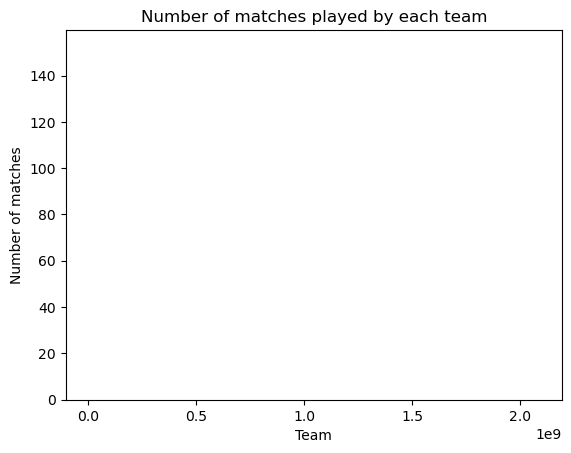

In [96]:
# Count the number of matches played by each team
team1_count = Matches["team1Id"].value_counts()
team2_count = Matches["team2Id"].value_counts()
total_count = team1_count + team2_count

# Plot the bar chart
plt.bar(total_count.index, total_count.values)
plt.xlabel("Team")
plt.ylabel("Number of matches")
plt.title("Number of matches played by each team")
plt.show()

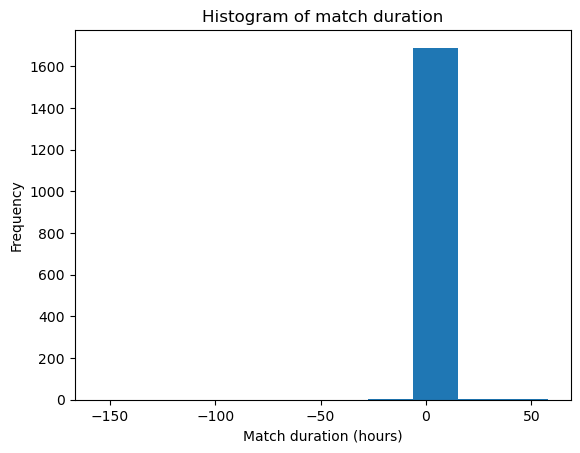

In [100]:
# Convert the matchDate and matchEndDate columns to datetime objects
Matches['matchDate'] = pd.to_datetime(Matches['matchDate'])
Matches['matchEndDate'] = pd.to_datetime(Matches['matchEndDate'])

# Calculate the match duration in hours and store it in a new column
Matches['matchDuration'] = (Matches['matchEndDate'] - Matches['matchDate']).dt.total_seconds() / 3600

# Plot a histogram of the match duration with 10 bins
plt.hist(Matches['matchDuration'], bins=10)

# Add labels and title
plt.xlabel('Match duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of match duration')

# Show the plot
plt.show()

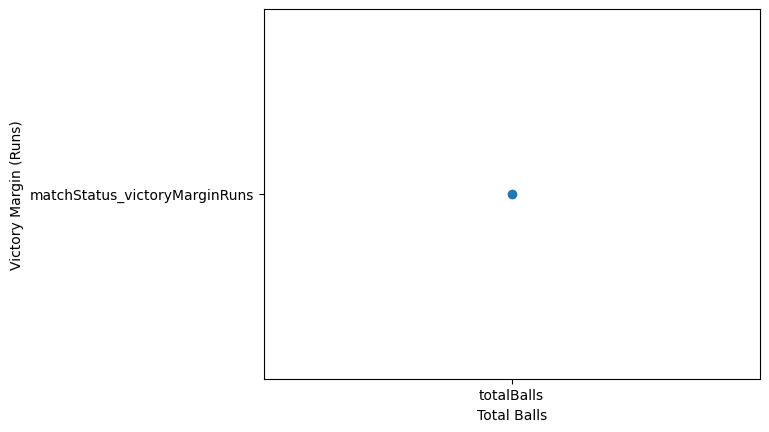

In [102]:
plt.scatter('totalBalls', 'matchStatus_victoryMarginRuns')
plt.xlabel('Total Balls')
plt.ylabel('Victory Margin (Runs)')
plt.show()

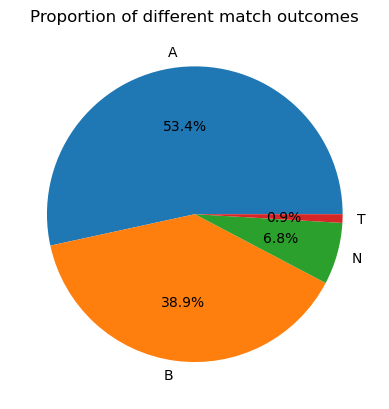

In [103]:
# Group the data by matchStatus_outcome and count the frequency
outcome_counts = Matches.groupby ("matchStatus_outcome").size ()

# Plot the pie chart with labels and percentages
plt.pie (outcome_counts, labels=outcome_counts.index, autopct="%1.1f%%")
plt.title ("Proportion of different match outcomes")
plt.show ()

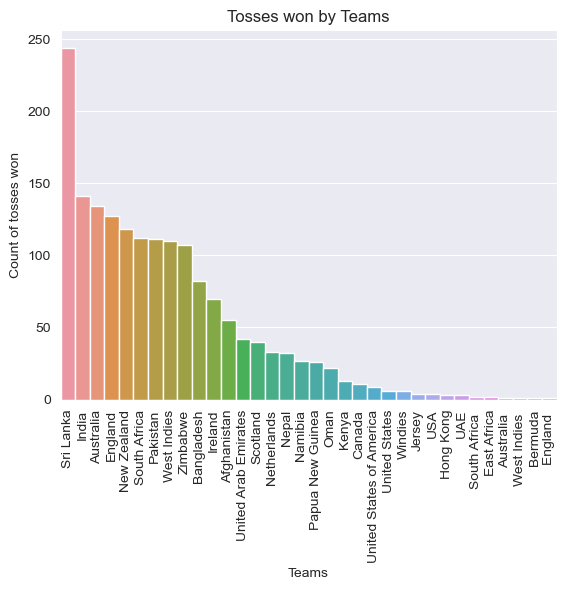

In [128]:
order = Matches['toss.winner'].value_counts().index
sns.set_style('darkgrid')
sns.set_palette('Blues')
g=sns.countplot(data=Matches,x='toss.winner',width=1,order=order)
g.set(xlabel='Teams',ylabel='Count of tosses won')
g.set_title('Tosses won by Teams')
plt.xticks(rotation=90)
plt.show()

Analysis Using Innings dataset

In [112]:
Innings.dtypes

id                 int64
matchId            int64
inningsNumber      int64
runRate          float64
overProgress     float64
runs               int64
wkts               int64
ballsFaced         int64
fours              int64
sixes              int64
allOut              bool
noBallRuns         int64
wideRuns           int64
byeRuns            int64
legByeRuns         int64
penaltyRuns        int64
battingTeamId     object
bowlingTeamId     object
dtype: object

In [114]:
# Define a function to detect outliers using z-scores
#def detect_outlier(Innings):
    outliers = []
    threshold = 3 # You can adjust this value
    mean = np.mean(Innings)
    std = np.std(Innings)
    for x in Innings:
        z_score = (x - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers

# Apply the function to each column of the dataframe
outliers_A = detect_outlier(Innings['runs'])
outliers_B = detect_outlier(Innings['sixes'])
outliers_C = detect_outlier(Innings['battingTeamId'])
outliers_C = detect_outlier(Innings['fours'])
#outliers_C = detect_outlier(Innings['Sixes'])
#outliers_C = detect_outlier(Innings['runs'])
# Print the outliers
print('Outliers in column A:', outliers_A)
print('Outliers in column B:', outliers_B)
print('Outliers in column C:', outliers_C)
print('Outliers in column C:', outliers_C)
#print('Outliers in column C:', outliers_C)
#print('Outliers in column C:', outliers_C)

IndentationError: unexpected indent (3472883191.py, line 3)

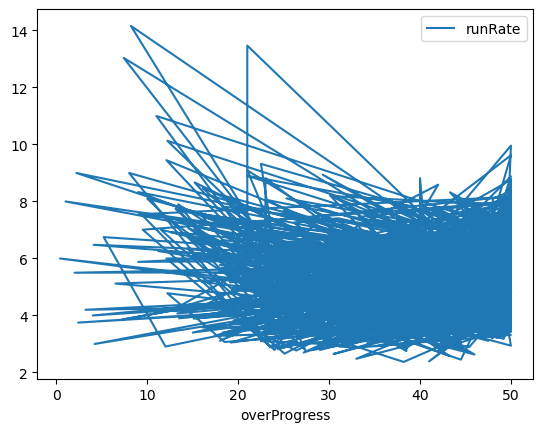

In [105]:
# plot a line plot using pandas.DataFrame.plot.line
Innings.plot.line(x="overProgress", y="runRate")

# show the plot
plt.show()

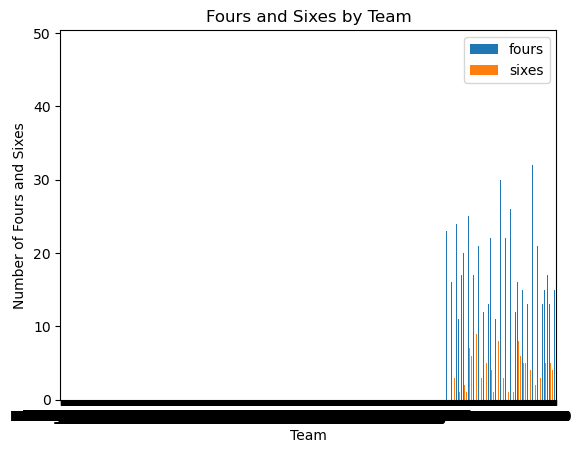

In [106]:
# Plot a bar plot of the number of fours and sixes scored by each team
ax = Innings.plot.bar(x="battingTeamId", y=["fours", "sixes"], rot=0, title="Fours and Sixes by Team")
ax.set_xlabel("Team")
ax.set_ylabel("Number of Fours and Sixes")
plt.show()

making it more visually appealing

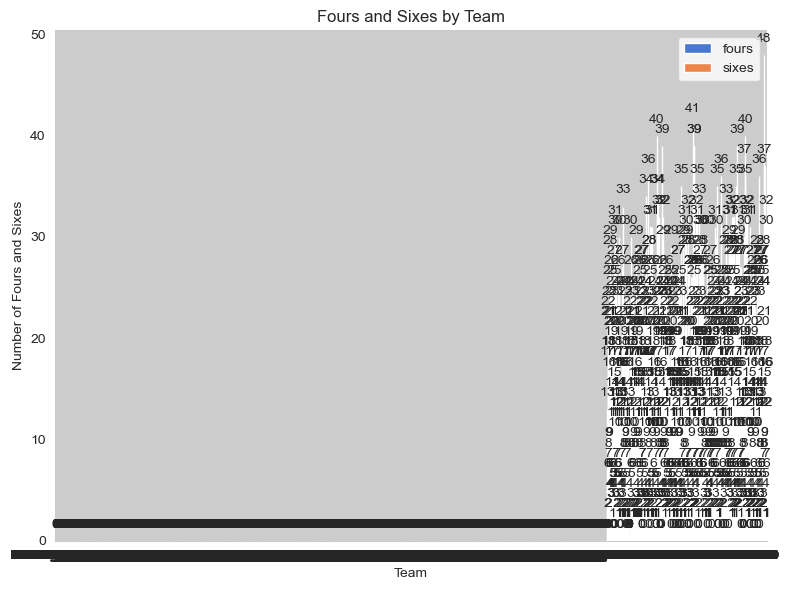

In [107]:
# Set the style and color palette of the plot
sns.set_style("whitegrid")
palette = sns.color_palette("muted")

# Plot the bar plot with the chosen style and palette
ax = Innings.plot.bar(x="battingTeamId", y=["fours", "sixes"], rot=0, title="Fours and Sixes by Team", color=palette)

# Add labels and legend
ax.set_xlabel("Team")
ax.set_ylabel("Number of Fours and Sixes")
ax.legend(loc="upper right")

# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Annotate the bars with the values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1), ha="center", va="bottom")

# Adjust the size and margins of the plot
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.show()

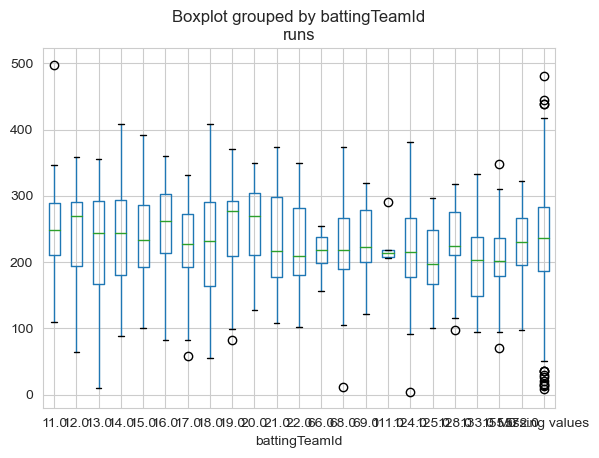

In [108]:
# create a box plot of the distribution of runs scored by each team
Innings.boxplot(column="runs", by="battingTeamId")
plt.show()

Visualizing Venues dataset

In [117]:
Venues.columns

Index(['id', 'fullName', 'shortName', 'city', 'country'], dtype='object')

In [125]:
Venues['country'].unique()

array(['India', 'South Africa', 'Sri Lanka', 'UAE', 'England',
       'Australia', 'West Indies', 'Wales', 'Zimbabwe', 'Scotland',
       'Ireland', 'Netherlands', 'Namibia', 'New Zealand',
       'Northern Ireland', 'Bangladesh', 'Malaysia', 'Pakistan', 'Kenya',
       'Papua New Guinea', 'USA', 'Trinidad & Tobago', 'Oman', 'Nepal',
       'Qatar', 'missing'], dtype=object)

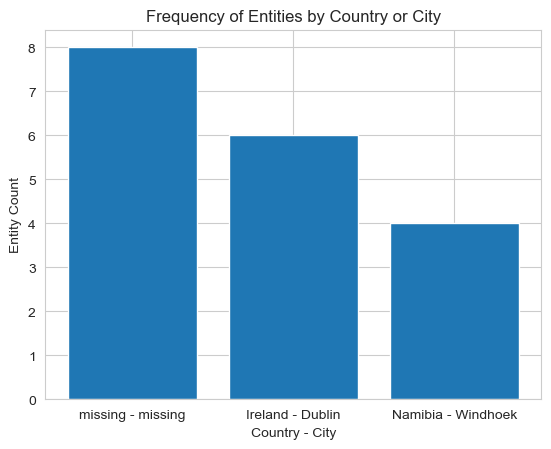

In [124]:
# Group by country and city and count the number of entities
grouped = Venues.groupby(["country", "city"])["fullName"].count().reset_index()

# Sort by descending order of entity count
sorted = grouped.sort_values(by="fullName", ascending=False)

# Select only the top three countries and cities
top_three = sorted.head(3)

# Plot a bar chart with country and city as x-axis and entity count as y-axis
plt.bar(x=top_three["country"] + " - " + top_three["city"], height=top_three["fullName"])
plt.xlabel("Country - City")
plt.ylabel("Entity Count")
plt.title("Frequency of Entities by Country or City")
plt.show()